# Data analysis for the Federal Agencies

Import the relevant packages.

In [1]:
using DataFrames, CSV, Plots, LaTeXStrings

Choose plots theme and color scheme.

In [2]:
Plots.theme(:dao)

In [3]:
pal = cgrad(:tol_muted);
cpal10 = [pal[i] for i in 0.0:0.02:1]

Need to import the data.

In [5]:
raw_data = DataFrame(CSV.File("./data/fed_rank_freq_each_org.csv"));
# remove missing values
c_data = disallowmissing!(raw_data[completecases(raw_data), :]);
first(c_data,5)

Row,AGY,OCC,EMPLOYMENT
,String3,Int64,Int64
1,AA,301,1
2,AA,340,1
3,AA,905,8
4,AA,2210,1
5,AB,80,1


Need to separate the data for each Federal Agency. Result of `groupby` is all the data for each separate agency.

In [6]:
each_agency = groupby(c_data, :AGY);

Let's have a look at the numbers of workers and numbers of roles in each Federal Agency.

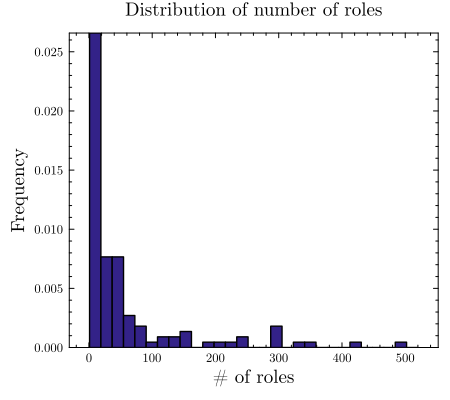

In [7]:
roles = [size(x)[1] for x in each_agency];
plot(grid = false, minorgrid = false, legend = :none, size = (450,400))
histogram!(roles, bins = range(minimum(roles), maximum(roles), length=30),
        xlabel = "# of roles", ylabel = "Frequency", normalize=:pdf, color = pal[1])
plot!(title = "Distribution of number of roles")

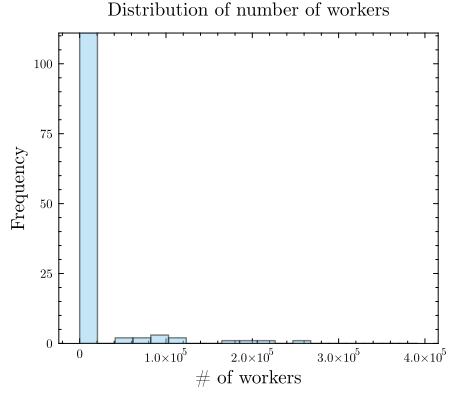

In [8]:
workers = [sum(x[!,:EMPLOYMENT]) for x in each_agency];
plot(grid = false, minorgrid = false, legend = :none, size = (450,400))
histogram!(workers, bins = range(minimum(workers), maximum(workers), length=20),
        xlabel = "# of workers", ylabel = "Frequency", color = pal[2], alpha = 0.5)
plot!(title = "Distribution of number of workers")

Plot the diversity (total number of elements) versus the total size of the Federal Agency (power-law fit done using Mathematica).

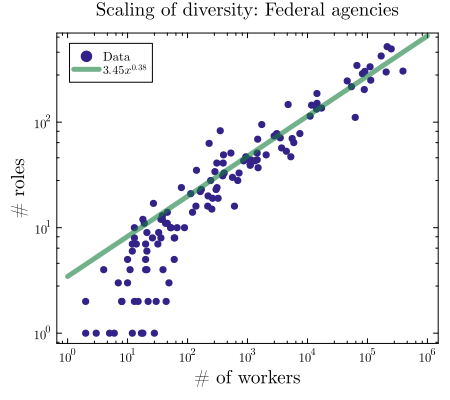

In [10]:
pdiv = plot(grid = false, minorgrid = false, legend = :none, size = (450,400))
scatter!(workers, roles, xaxis = :log, yaxis = :log, color = cpal10[1],
        xlabel = "# of workers", ylabel = "# roles", label = "Data", legend = :topleft, shape = :circle)
plot!(title = "Scaling of diversity: Federal agencies")
plot!(collect(1:1000:10^6),[3.45*x^0.38 for x in collect(1:1000:10^6)], 
    ylims = [0.8,700], color = cpal10[19], label = L"3.45x^{0.38}", width = 5, alpha = 0.6)
# savefig("scaling-div-FAs.pdf")

And now let's plot some of the rank-frequency distributions of the data. Say for the first 50 Federal Agencies.

In [11]:
norm_rank_freq = []
for i in 1:50
    d = sort(each_agency[i][!,:EMPLOYMENT],rev=true)
    norm_d = d./sum(d)
    push!(norm_rank_freq,norm_d)
end

In [12]:
norm_rank_freq;

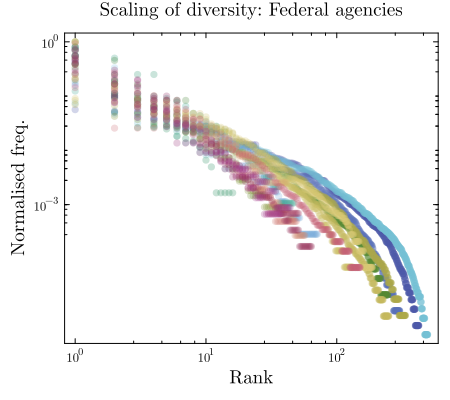

In [17]:
plot(grid = false, minorgrid = false, legend = :none, size = (450,400))
for (i,d) in enumerate(norm_rank_freq)
    scatter!(d, xaxis = :log, yaxis = :log, color = cpal10[i], alpha = 0.25)
end
plot!(title = "Scaling of diversity: Federal agencies", xlabel = "Rank", ylabel = "Normalised freq.")
# savefig("log-log-rf-FAs.pdf")

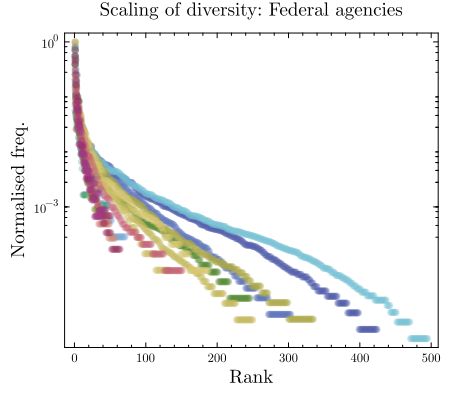

In [15]:
plot(grid = false, minorgrid = false, legend = :none, size = (450,400))
for (i,d) in enumerate(norm_rank_freq)
    scatter!(d, yaxis = :log, color = cpal10[i], alpha = 0.25)
end
plot!(title = "Scaling of diversity: Federal agencies", xlabel = "Rank", ylabel = "Normalised freq.")
# savefig("scaling-div-fas-rf-exp.png")